In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm 
import seaborn as sns
from patsy import dmatrix

In [18]:
# Load the combined data
combined_data = pd.read_csv("Combined Data.csv")

# Convert the 'Date' column to datetime format
combined_data['Date'] = pd.to_datetime(combined_data['Date'], errors='coerce')
combined_data['Total_nonfarm'] = pd.to_numeric(combined_data['Total_nonfarm'], errors='coerce')
combined_data['Total_private'] = pd.to_numeric(combined_data['Total_private'], errors='coerce')

# Set the 'Date' column as the index
combined_data.set_index('Date', inplace=True)

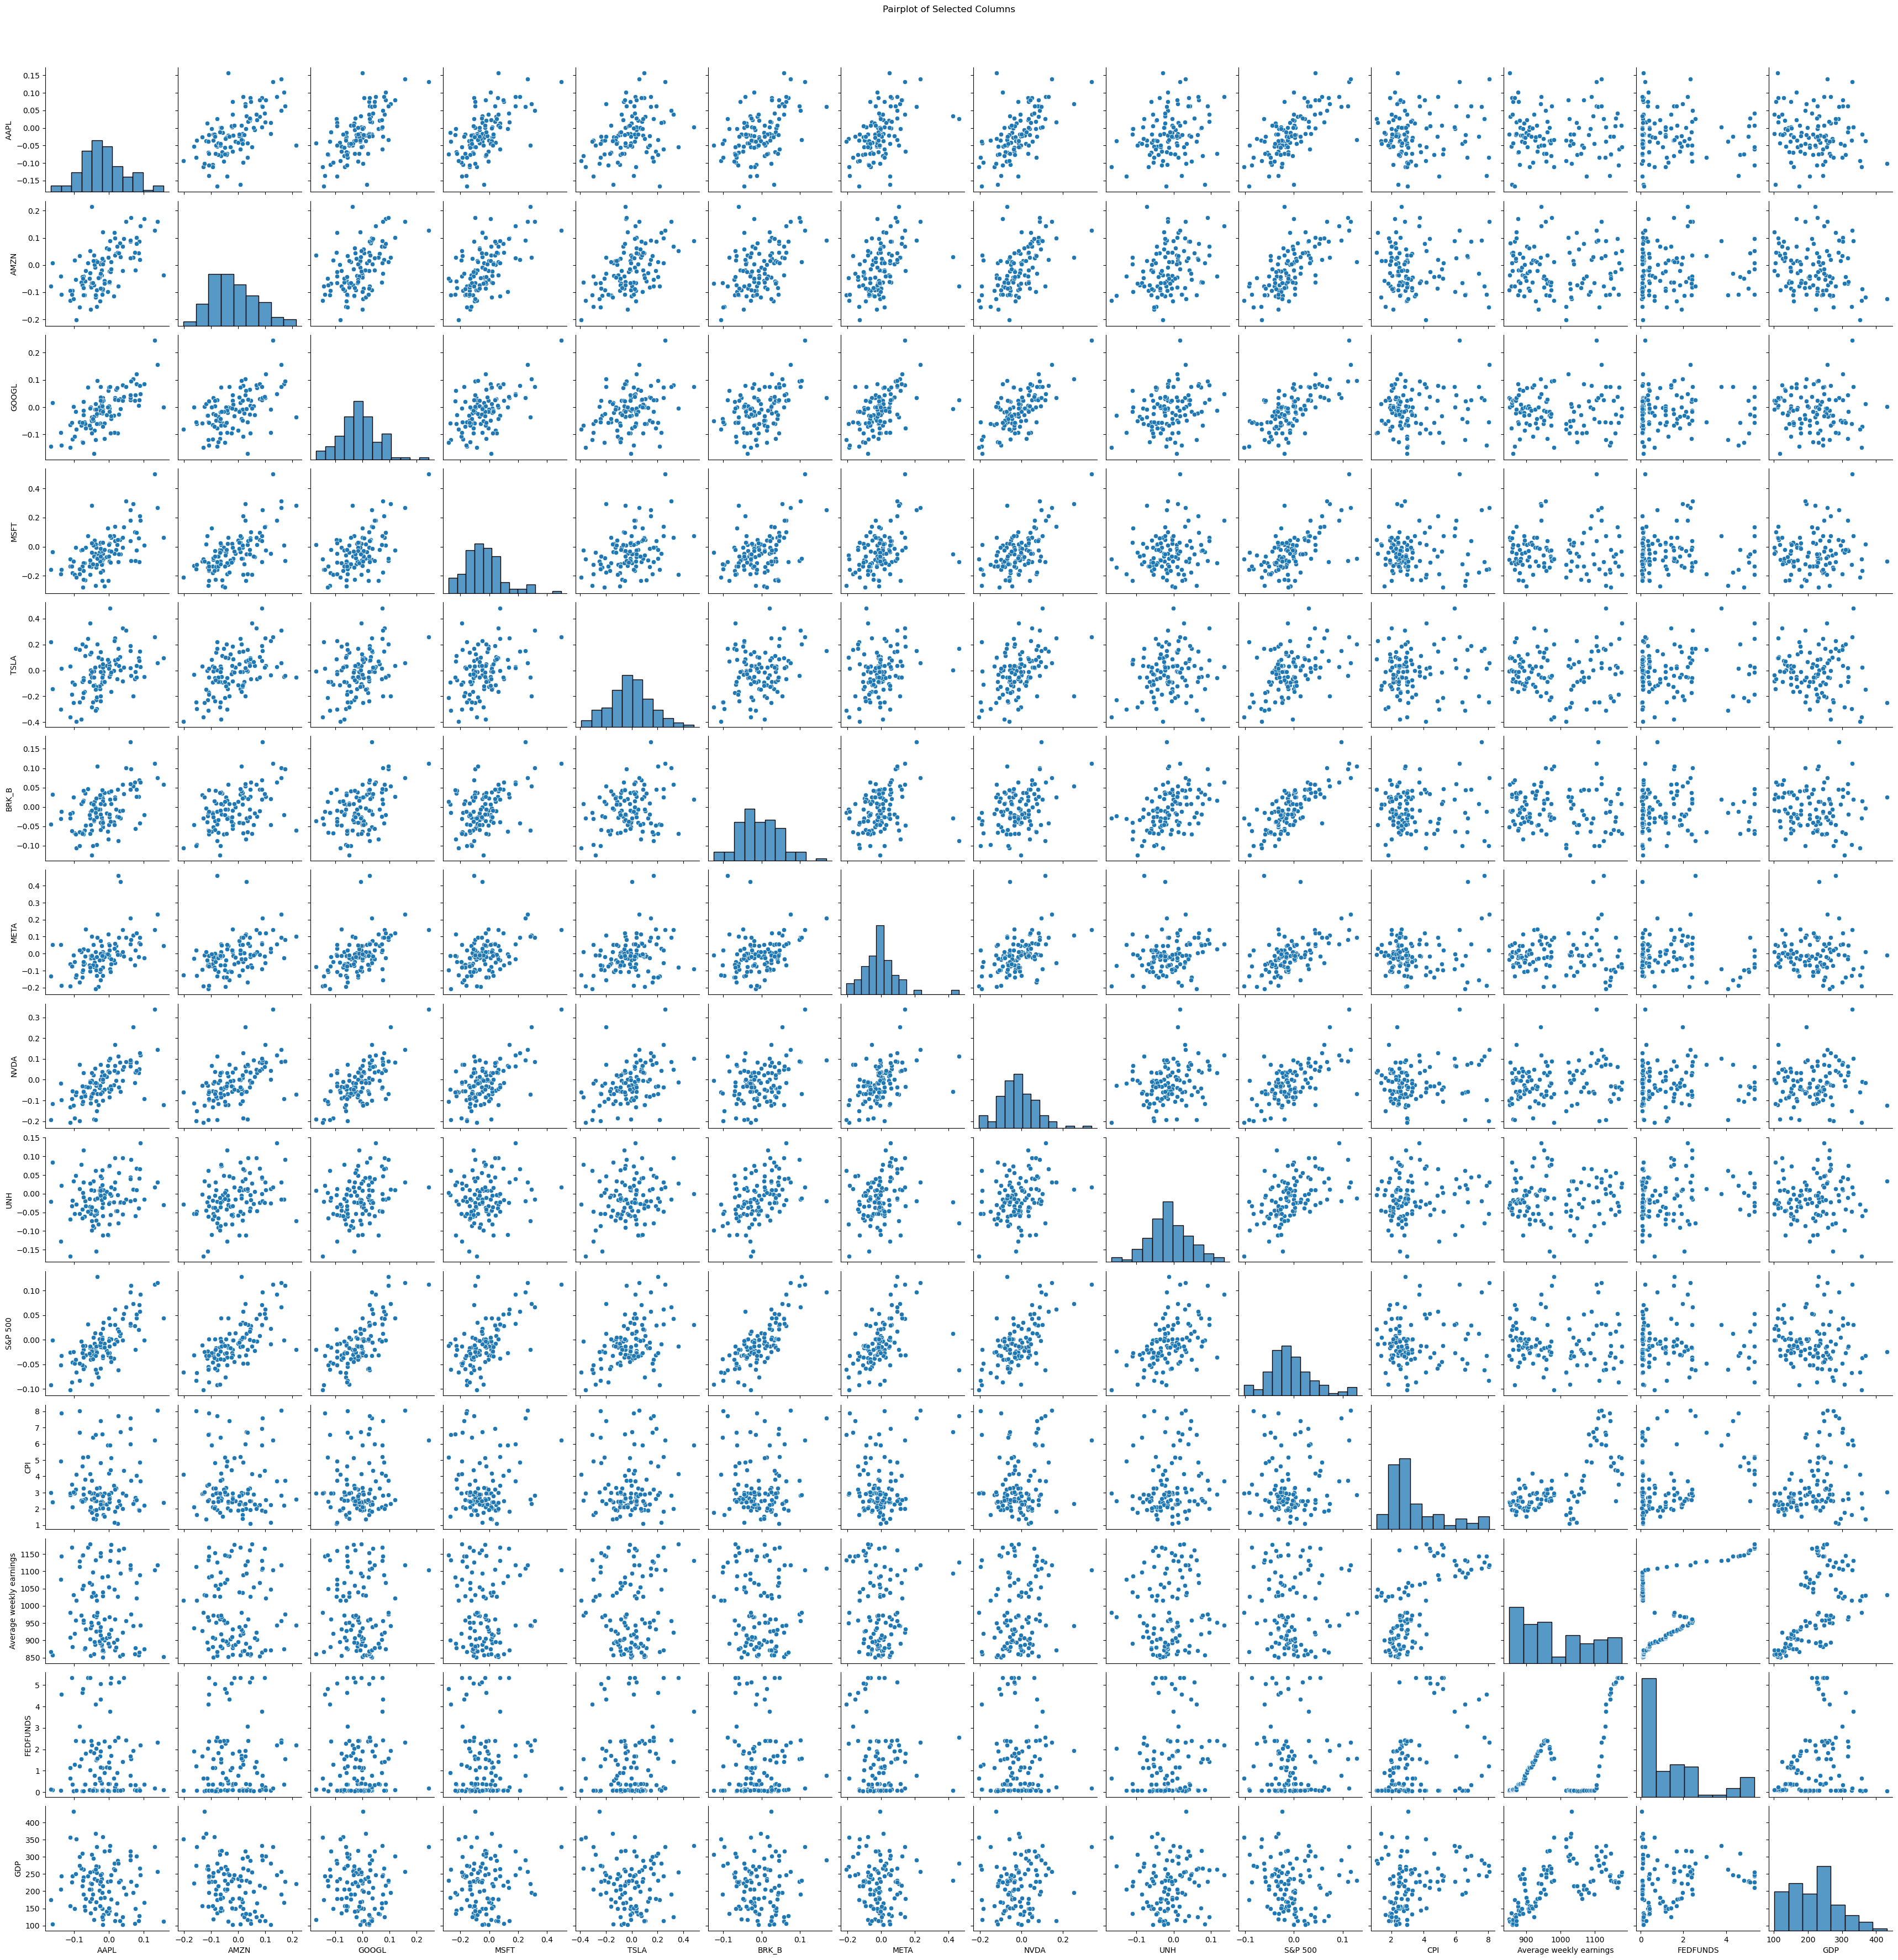

In [ ]:
# Create a pairplot
sns.pairplot(combined_data)
plt.suptitle('Pairplot of Selected Columns', y=1.02)
plt.show()

In [19]:
independent_vars = ' + '.join([f'{col}' for col in combined_data.columns if col != 'SP_500'])
formula = f'SP_500 ~ {independent_vars}'
print(independent_vars)
model = ols(formula, data=combined_data).fit()

print(model.summary())

print(anova_lm(model))

AAPL + AMZN + GOOGL + MSFT + TSLA + BRK_B + META + NVDA + UNH + CPI + Total_nonfarm + Total_private + Average_weekly_earnings + FEDFUNDS + GDP
                            OLS Regression Results                            
Dep. Variable:                 SP_500   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     37.11
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           9.21e-32
Time:                        13:12:58   Log-Likelihood:                 281.56
No. Observations:                 105   AIC:                            -531.1
Df Residuals:                      89   BIC:                            -488.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|